(0.0, 1.01)

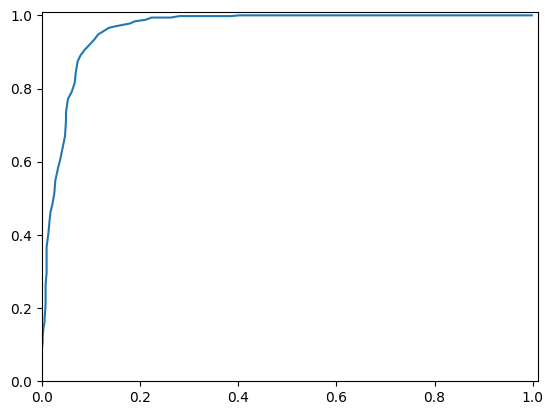

In [18]:
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
np.random.seed(0)

# исходные параметры распределений классов
r1 = -0.2
D1 = 3.0
mean1 = [1, -5]
V1 = [[D1, D1 * r1], [D1 * r1, D1]]

r2 = 0.5
D2 = 2.0
mean2 = [-1, -2]
V2 = [[D2, D2 * r2], [D2 * r2, D2]]

# моделирование обучающей выборки
N1 = 1000
N2 = 1000
x1 = np.random.multivariate_normal(mean1, V1, N1).T
x2 = np.random.multivariate_normal(mean2, V2, N2).T

data_x = np.hstack([x1, x2]).T
data_y = np.hstack([np.ones(N1) * -1, np.ones(N2)])

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, random_state=123,test_size=0.5, shuffle=True)

clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)

w = [*clf.intercept_, *clf.coef_[0]]
range_t = np.arange(5.7, -7.8, -0.1)
FPR, TPR = [], []
x_t = np.array([[1, x[0], x[1]] for x in x_test])

for t in range_t:
    predict = np.array([np.sign(np.dot(w, x) - t) for x in x_t])
    # print(predict)
    TP = sum(predict[y_test==1]==1)
    TN = sum(predict[y_test==-1]==-1)
    FP = sum(predict[y_test==-1]==1)
    FN = sum(predict[y_test==1]==-1)
    FPR.append(FP / (FP + TN))
    TPR.append(TP / (TP + FN))

# plt.plot(FPR, TPR)
# plt.xlim(0, 1.01)
# plt.ylim(0, 1.01)